In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('pc.xlsx',sheet_name='ENX Amsterdam Polkadot ETPs')

In [3]:
list(df.iloc[0])

[nan, 'ADOT NA Equity', nan, 'DOTVA NA Equity', nan, 'VDOT NA Equity', nan]

In [4]:
list(df.iloc[1])

['Dates',
 'TURNOVER',
 'AVERAGE_BID_ASK_SPREAD_%',
 'TURNOVER',
 'AVERAGE_BID_ASK_SPREAD_%',
 'TURNOVER',
 'AVERAGE_BID_ASK_SPREAD_%']

In [5]:
col = ['Dates',
 '21Shares ADOT TURNOVER',
 '21Shares ADOT AVERAGE_BID',
 'VanEck VDOT TURNOVER',
 'VanEck VDOT AVERAGE_BID',
 'Valour DOTVA TURNOVER',
 'Valour DOTVA AVERAGE_BID']

In [6]:
df.columns = col

In [7]:
df = df.iloc[2:262]

In [8]:
df.reset_index(drop=True,inplace=True)

In [9]:
df

,Dates,21Shares ADOT TURNOVER,21Shares ADOT AVERAGE_BID,VanEck VDOT TURNOVER,VanEck VDOT AVERAGE_BID,Valour DOTVA TURNOVER,Valour DOTVA AVERAGE_BID
0,2021-05-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-05-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-05-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-05-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-05-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
255,2022-04-25 00:00:00,134754.6,0.7102,NaN,0.7237,1545.94,0.7056
256,2022-04-26 00:00:00,134754.6,0.6974,NaN,0.7293,1545.94,0.6674
257,2022-04-27 00:00:00,134754.6,0.7049,NaN,0.723,1545.94,0.688
258,2022-04-28 00:00:00,134754.6,0.6983,NaN,0.711,5210,0.6826


In [10]:
df.isna().sum()

Dates                          0
21Shares ADOT TURNOVER       107
21Shares ADOT AVERAGE_BID    103
VanEck VDOT TURNOVER         260
VanEck VDOT AVERAGE_BID      242
Valour DOTVA TURNOVER        105
Valour DOTVA AVERAGE_BID     104
dtype: int64

In [11]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [12]:
df.dtypes

Dates                        datetime64[ns]
21Shares ADOT TURNOVER               object
21Shares ADOT AVERAGE_BID            object
VanEck VDOT TURNOVER                 object
VanEck VDOT AVERAGE_BID              object
Valour DOTVA TURNOVER                object
Valour DOTVA AVERAGE_BID             object
dtype: object

In [13]:
for col in list(df)[1:]:
    df[col] = df[col].astype('float')

In [14]:
df.dtypes

Dates                        datetime64[ns]
21Shares ADOT TURNOVER              float64
21Shares ADOT AVERAGE_BID           float64
VanEck VDOT TURNOVER                float64
VanEck VDOT AVERAGE_BID             float64
Valour DOTVA TURNOVER               float64
Valour DOTVA AVERAGE_BID            float64
dtype: object

In [15]:
df['Year'] = df['Dates'].dt.year 
df['Month'] = df['Dates'].dt.month 

In [16]:
dict_mnth = {
    1:'JAN',
    2:'FEB',
    3: 'MARCH',
    4: 'APRIL',
    5: 'MAY',
    6: 'JUNE',
    7: 'JULY',
    8: 'AUG',
    9: 'SEP',
    10: 'OCT',
    11: 'NOV',
    12: 'DEC'
}

# Turnover

In [17]:
turnover_col = [name for name in list(df) if 'TURNOVER' in name]
df_new = df.groupby(['Year','Month'])[turnover_col].sum()
df_new = df_new.reset_index()

In [18]:
df_new

,Year,Month,21Shares ADOT TURNOVER,VanEck VDOT TURNOVER,Valour DOTVA TURNOVER
0,2021,5,0.00,0.0,0.00
1,2021,6,0.00,0.0,0.00
2,2021,7,0.00,0.0,0.00
3,2021,8,0.00,0.0,0.00
4,2021,9,68598.74,0.0,70707.80
5,2021,10,1986934.78,0.0,263043.20
6,2021,11,1009779.50,0.0,356179.84
7,2021,12,264123.35,0.0,32774.01
8,2022,1,1404973.88,0.0,342024.51
9,2022,2,857324.84,0.0,38805.60


In [19]:
yr_month = []
for _,row in df_new.iterrows():
    
    yr_month.append(str(row['Year']).split('.')[0]+'_'+dict_mnth[row['Month']])
    
df_new['yr_month'] = yr_month

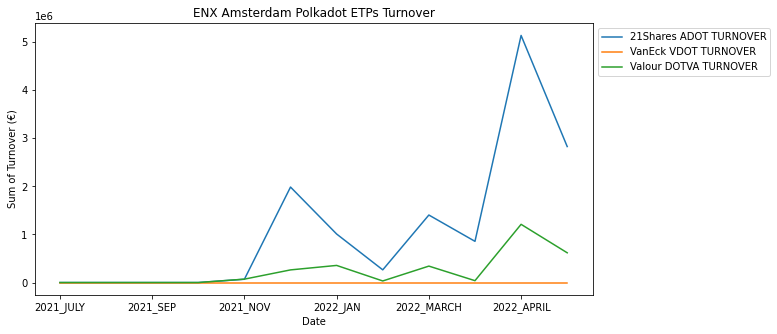

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
# turnover_col = [name for name in list(df_new) if 'TURNOVER' in name]
new_name = df_new['yr_month'].iloc[[0,2,4,6,8,10,11]]
for col in turnover_col:
    ax.plot(list(range(len(df_new))),list(df_new[col]),label=col)
ax.set_xticklabels(new_name)
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title("ENX Amsterdam Polkadot ETPs Turnover")
plt.xlabel("Date")
plt.ylabel("Sum of Turnover (€)")
plt.savefig("amsdot_turnover.png", bbox_inches = "tight")
plt.show()

# Average bid

In [21]:
bid_col = [name for name in list(df) if 'AVERAGE_BID' in name]

In [22]:
df_bid = df.groupby(['Year','Month'])[bid_col].mean()*100
df_bid = df_bid.reset_index()

In [23]:
df_bid

,Year,Month,21Shares ADOT AVERAGE_BID,VanEck VDOT AVERAGE_BID,Valour DOTVA AVERAGE_BID
0,2021,5,NaN,NaN,NaN
1,2021,6,NaN,NaN,NaN
2,2021,7,NaN,NaN,NaN
3,2021,8,NaN,NaN,NaN
4,2021,9,70.611667,NaN,66.522000
5,2021,10,58.822857,NaN,58.921905
6,2021,11,69.745000,NaN,60.788182
7,2021,12,64.243913,NaN,64.857391
8,2022,1,62.451429,NaN,66.514286
9,2022,2,67.685500,NaN,67.274500


In [24]:
c = ['gold','c','darkgreen','g','b','lightblue','darkblue','brown','grey']

In [25]:
len(bid_col)

3

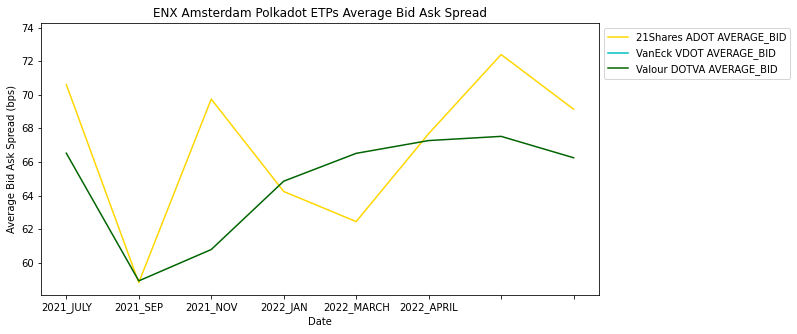

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
new_name = df_new['yr_month'].iloc[[0,2,4,6,8,10,11]]
for i,col in enumerate(bid_col):
    ax.plot(list(range(len(df_bid))),list(df_bid[col]),label=col,color=c[i])
ax.set_xticklabels(new_name)
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title("ENX Amsterdam Polkadot ETPs Average Bid Ask Spread")
plt.xlabel("Date")
plt.ylabel("Average Bid Ask Spread (bps)")
plt.savefig("amsdot_bid_ask.png", bbox_inches = "tight")
plt.show()